<span style="color: red; font-size: 30px;">
<strong>Machine Learning - Supervised Learning - KNN(K-Nearest Neighbors) </strong>
</span> 

## 📚 Table of Contents / İçindekiler

1. 📖 **Introduction** / _Giriş_  
2. 📊 **Dataset Overview** / _Veri Seti Genel Bakış_ 
3. 🧾 **Reading the Dataset** / _Veri Seti Okuma_ 
4. 🔍 **Exploratory Data Analysis (EDA)** / _Keşifsel Veri Analizi_  
5. 🛠️ **Data Preprocessing** / _Veri Ön İşleme_  
6. ⚖️ **Data Scaling** / _Veri Ölçekleme_  
7. ✂️ **Train/Test Split** / _Veri Setini Ayırma_  
8. 🤖 **Model Training** / _Modeli Eğitme_  
9. 📊 **Evaluation Metrics ( MAE, RMSE, R² )** / _Değerlendirme Metrikleri_   
10. 🔄 **(Optional) Confusion Matrix – Binary View** / _(Opsiyonel) İkili Görünüm_
11. 👥 **Finding Optimal Neighbors (K Value)** / _En Uygun Komşu Sayısını Belirleme_  
12. 📈 **Final Model Training & Evaluation** / _Son Modeli Eğitme ve Değerlendirme_  
13. 🧾 **Results & Conclusions** / _Sonuçlar ve Değerlendirme_  
14. 🚀 **Model Usage Scenario** / _Modelin Kullanım Senaryosu_

## **1. 📖 Introduction** / _Giriş_  

## 🔹 What is K-Nearest Neighbors (KNN)? 🔹 KNN Nedir?  
K-En Yakın Komşular (KNN), hem **sınıflandırma (classification)** hem de **regresyon (regression)** problemlerinde kullanılan **denetimli öğrenme algoritmasıdır**.  
Temel mantığı **benzerlik prensibine** dayanır:  
- Yeni bir veriyi tahmin etmek için, eğitim veri setindeki en yakın *K* komşusuna bakar.  
- Bu komşuların **çoğunluk sınıfına (classification)** veya **ortalama değerine (regression)** göre karar verir.  

KNN, **“tembel öğrenici” (lazy learner)** olarak bilinir. Çünkü model kurma aşamasında karmaşık bir işlem yapmaz; veriyi saklar ve tahmini, yeni veri geldiğinde doğrudan hesaplar.  

---

## 🔹 Where is KNN Used? / KNN Nerelerde Kullanılır?  

✅ **Classification (Sınıflandırma)**  
- Hastalık teşhisi (ör: hasta / sağlıklı)  
- El yazısı tanıma  
- Müşteri segmentasyonu  

✅ **Regression (Regresyon)**  
- Ev fiyatı tahmini  
- Satış tahminleri  
- Piyasa trend analizleri  

✅ **Recommendation Systems (Öneri Sistemleri)**  
- Kullanıcıya benzer ürün/film önerileri  


# 📊 **2. Dataset Overview** / _Veri Seti Genel Bakış_  

## 📘 Project: House Prices – KNN (K-Nearest Neighbors)  

- Veri seti: **House Prices - Advanced Regression Techniques**  
- Kaynak: Kaggle üzerinden alınmıştır.  
- Amaç: Bu projede, **KNN algoritması** kullanılarak konut fiyatları tahmin edilecektir.  

---

## 📘 Veri Setinin Konusu  
Bu veri seti, ev fiyatlarını etkileyen farklı yapısal ve çevresel özellikleri içermektedir.  
Amaç, evin çeşitli özelliklerini (ör. metrekare, oda sayısı, kalite) kullanarak **ev satış fiyatını (SalePrice)** tahmin etmektir.  

---

## 📑 Sütunlar (Değişkenler)  

Veri setinde toplam **81 sütun** bulunmaktadır. Bunlardan bazıları:  

- **MSSubClass**: Konut tipi (class of the dwelling)  
- **MSZoning**: İmar durumu  
- **LotFrontage**: Yola bakan cephe uzunluğu (feet)  
- **LotArea**: Arsa büyüklüğü (feet²)  
- **Street**: Evin bulunduğu yolun tipi  
- **Neighborhood**: Mahalle bilgisi  
- **OverallQual**: Malzeme ve bitirme kalitesi  
- **OverallCond**: Genel durum  
- **YearBuilt**: İnşa yılı  
- **GrLivArea**: Yaşanabilir alan büyüklüğü (feet²)  
- **GarageCars**: Garaj kapasitesi (araç sayısı)  
- **SaleType**: Satış tipi  
- **SaleCondition**: Satış koşulu  
- **SalePrice**: Satış fiyatı (**hedef değişken**)  


## 🎯 Hedef  
Bu proje kapsamında amaç:  
- **Girdi (features):** 80 bağımsız değişken  
- **Çıktı (target):** `SalePrice`  

## KNN algoritması kullanılarak konut fiyatları tahmin edilecektir.  


## 3. 🧾 **Reading the Dataset** / _Veri Seti Okuma_ 

In [101]:
# Gerekli kütüphaneleri projeye dahil ediyoruz.
# Çalışmamızda veri analizi için `pandas` kütüphanesini kullanıyoruz.
import pandas as pd # Veri analizi ve veri işleme için kullanılır.

In [102]:
# Veri setini okuyoruz ve bir DataFrame'e aktarıyoruz.
# Verinin ilk 5 satırını görüntülüyoruz ve kontrol etmiş oluyoruz.
df = pd.read_csv(
    filepath_or_buffer='data/House_Prices.csv'
)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 4. 🔍 **Exploratory Data Analysis (EDA)** / _Keşifsel Veri Analizi_ 

In [103]:
# 1.460 satır ve 81 sütunumuz bulunmaktadır.
df.shape

(1460, 81)

In [104]:
# Veri setimizden 'Id' sütununu kalıcı olarak silelim.
# 'Id' sadece bir tanımlayıcı olduğundan modelleme için faydalı değildir.
df.drop(
    columns=['Id'],
    axis=1,
    inplace=True
)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
# Veri setinin genel yapısını, sütun isimlerini, veri tiplerini ve eksik değerleri özet olarak gösterdik.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [106]:
# Veri setinin özet istatistiklerini alalım ve sayıları 2 ondalık basamağa yuvarladık.
round(df.describe(), 2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [107]:
# Kategorik (object tipindeki) sütunların özet istatistiklerini görüntüleyelim
# count  → sütunda kaç değer olduğunu gösterir
# unique → farklı kategori sayısını gösterir
# top    → en sık görülen kategoriyi gösterir
# freq   → en sık görülen kategorinin tekrar sayısını gösterir
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [108]:
# Her sütun için benzersiz (unique) değer sayısını hesapladık.
[
   [col, len(df[col].unique())] for col in df.columns
]

[['MSSubClass', 15],
 ['MSZoning', 5],
 ['LotFrontage', 111],
 ['LotArea', 1073],
 ['Street', 2],
 ['Alley', 3],
 ['LotShape', 4],
 ['LandContour', 4],
 ['Utilities', 2],
 ['LotConfig', 5],
 ['LandSlope', 3],
 ['Neighborhood', 25],
 ['Condition1', 9],
 ['Condition2', 8],
 ['BldgType', 5],
 ['HouseStyle', 8],
 ['OverallQual', 10],
 ['OverallCond', 9],
 ['YearBuilt', 112],
 ['YearRemodAdd', 61],
 ['RoofStyle', 6],
 ['RoofMatl', 8],
 ['Exterior1st', 15],
 ['Exterior2nd', 16],
 ['MasVnrType', 4],
 ['MasVnrArea', 328],
 ['ExterQual', 4],
 ['ExterCond', 5],
 ['Foundation', 6],
 ['BsmtQual', 5],
 ['BsmtCond', 5],
 ['BsmtExposure', 5],
 ['BsmtFinType1', 7],
 ['BsmtFinSF1', 637],
 ['BsmtFinType2', 7],
 ['BsmtFinSF2', 144],
 ['BsmtUnfSF', 780],
 ['TotalBsmtSF', 721],
 ['Heating', 6],
 ['HeatingQC', 5],
 ['CentralAir', 2],
 ['Electrical', 6],
 ['1stFlrSF', 753],
 ['2ndFlrSF', 417],
 ['LowQualFinSF', 24],
 ['GrLivArea', 861],
 ['BsmtFullBath', 4],
 ['BsmtHalfBath', 3],
 ['FullBath', 4],
 ['HalfBat

In [109]:
# Her sütunda kaç tane benzersiz (unique) değer olduğunu tablo halinde gösterdik.
# Sonuçları 'Unique Values' sütununa göre büyükten küçüğe sıralayalım.
df_uniques = pd.DataFrame(                               # Yeni bir DataFrame oluşturduk.
    [[col, df[col].nunique()] for col in df.columns],    # Her sütun için unique değer sayısını hesapladık.
    columns=['Veriable Name', 'Unique Values']           # Kolon adlarını belirledik.
).set_index('Veriable Name')                             # Sütun adını index olarak ayarladık.
df_uniques.sort_values('Unique Values', ascending=False) # Unique sayısına göre büyükten küçüğe sıraladık.

,Unique Values
Veriable Name,
LotArea,1073
GrLivArea,861
BsmtUnfSF,780
1stFlrSF,753
TotalBsmtSF,721
...,...
BsmtHalfBath,3
Utilities,2
Street,2


In [110]:
# Sayısal sütunlar
numeric_variables = list(df.select_dtypes(include=['int64', 'float64']).columns) # Sonucu listeye çevirdik ve sadece int64 ve float64 tipindeki sütunları seçtik.
numeric_variables # seçilen sayısal sütunları gösterdik.

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [111]:
# Kategorik sütunlar
categorical_variables = list(df.select_dtypes(include=['object']).columns) # Sonucu listeye çevirdik ve sadece 'object' tipindeki sütunları seçtik.
categorical_variables # seçilen kategorik sütunları gösterdik.

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [112]:
# Unique değeri 2 olan sütunlar (Binary)
# df.columns         → tüm sütun adlarını aldık.
# df[col].nunique()  → sütundaki benzersiz (unique) değer sayısını verdik.
#                      (nunique = "number of unique","benzersiz sayı anlamına gelir.")
# == 2               → eğer bir sütunda sadece 2 farklı değer varsa (ör: Yes/No, Male/Female)
# list comprehension → bu koşulu sağlayan sütunları liste haline getirdik.
# Binary, değişken anlamına gelir. → sadece 2 farklı kategoriye sahip olan sütunlar (ör: Evet/Hayır, Var/Yok)
binary_variables = [col for col in df.columns if df[col].nunique() == 2]
binary_variables  # binary sütunların isimlerini gösterdik.

['Street', 'Alley', 'Utilities', 'CentralAir']

## 5. 🛠️ **Data Preprocessing** / _Veri Ön İşleme_  

In [113]:
# Binary sütunları 0/1 sayısala dönüştürdük.
mapping = {                  # String değerleri sayısala çevirmek için eşleme tablosu
    'Y': 1, 'N': 0,          # Y / N → 1 / 0
    'Yes': 1, 'No': 0,       # Yes / No → 1 / 0
    'T': 1, 'F': 0,          # T / F → 1 / 0
    'True': 1, 'False': 0    # True / False → 1 / 0
}

for col in binary_variables:        # tüm binary sütunlarda gezdik.
    if df[col].dtype == 'object':   # eğer sütun tipinin object (string) olduğunu kontrol ettik.
        df[col] = df[col].map(lambda x: mapping.get(str(x), x))
        # map → her değer için mapping sözlüğünden karşılığını aldık. map fonksiyonu bir sütundaki her bir değere belirlediğin dönüşümü uygular.
        # str(x) → değerleri string’e çevirdik. (farklı tipler olabilir diye)
        # mapping.get(..., x) → eşleşme yoksa orijinal değeri bıraktık.
        # lambda anonim(isimsiz) fonksiyon demektir.Tek satırlık küçük dönüşümler için lambda kullanılıyor ve tek satırlık mini fonksiyon, burada mapping’e bakıyor.
        # get fonksiyonu bir sözlükten anahtar (key) kullanarak değer (value) almak için kullanılır.

In [114]:
# Tekrardan veri setinin genel yapısını, sütun isimlerini, veri tiplerini ve eksik değerleri özet olarak gösterdik.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 6. ⚖️ **Data Scaling** / _Veri Ölçekleme_  

In [115]:
from sklearn.preprocessing import StandardScaler                    # Verileri ortalama=0 ve std=1 olacak şekilde ölçeklemek için kullanılır.

scaler = StandardScaler()                                           # StandardScaler nesnesi oluşturduk. (ortalama=0, std=1 olacak şekilde ölçekler)
num_features = [c for c in numeric_variables if c != "SalePrice"]   # Hedef değişken hariç tüm sayısal sütunları seçtik.

df_scaled = df.copy()                                               # Orijinal veri setinin bir kopyasını aldık.
df_scaled[num_features] = scaler.fit_transform(df[num_features])    # Sayısal sütunlara ölçekleme uyguladık. (fit + transform)
df_scaled[num_features].head()                                      # Ölçeklenmiş verinin ilk 5 satırını gösterdik.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


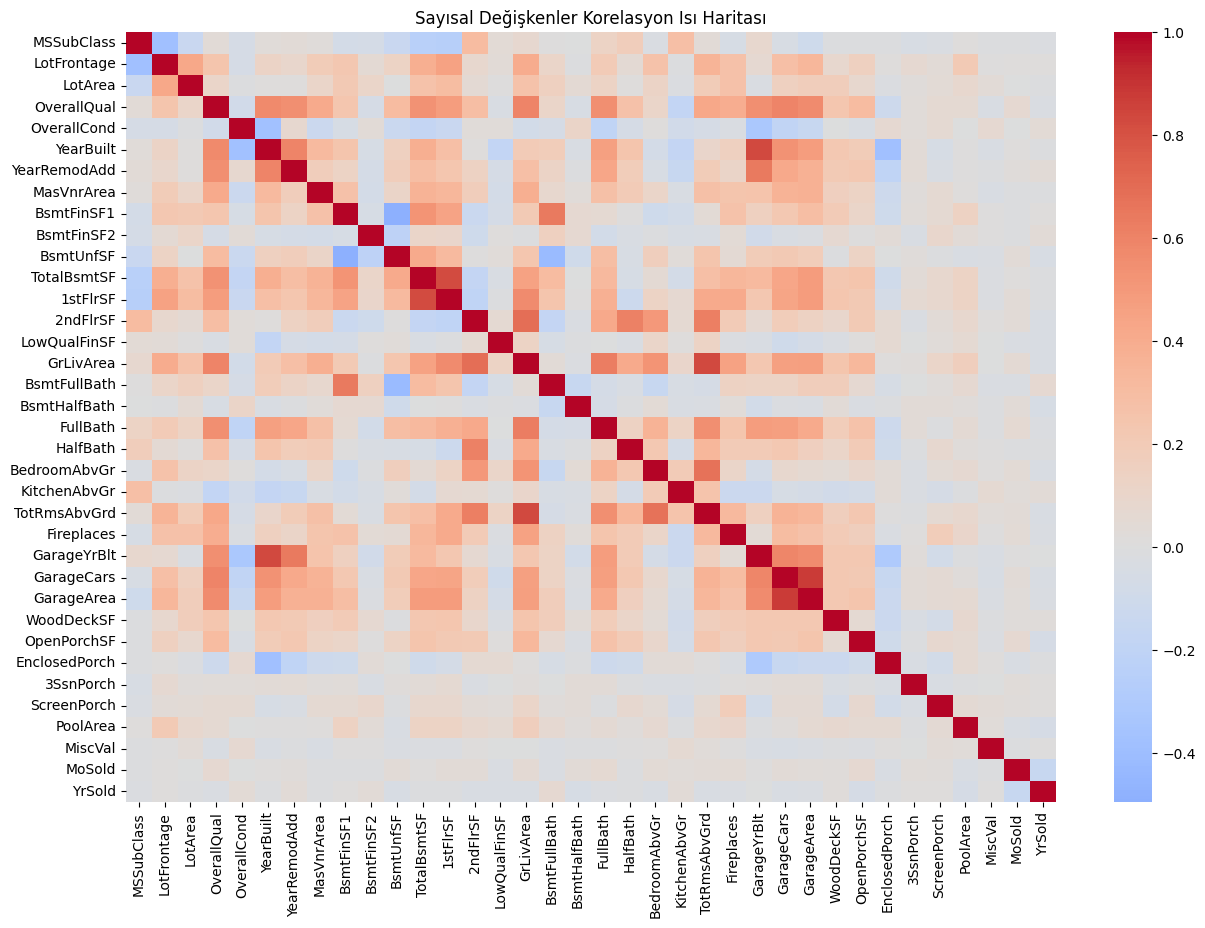

In [116]:
import seaborn as sns                                     # Veri görselleştirme kütüphanesi (özellikle istatistiksel grafikler için)
import matplotlib.pyplot as plt                           # Grafik çizimleri için kullanılan matplotlib modülü

plt.figure(figsize=(15,10))                               # Grafik boyutunu ayarladık. (15x10 inç)
sns.heatmap(                                              # Isı haritası oluşturduk.
            df_scaled[num_features].corr(),               # Sayısal değişkenler arasındaki korelasyonları hesapladık.
            cmap="coolwarm",                              # Renk paleti (soğuk renkler negatif, sıcak renkler pozitif)
            center=0                                      # Renk skalasını 0 etrafında merkezledik.
) 
plt.title("Sayısal Değişkenler Korelasyon Isı Haritası")  # Başlık ekledik.
plt.show()                                                # Grafiği gösterdik.


# Önce StandardScaler ile sayısal verileri ölçekledik. (ortalama=0, std=1).
# Böylece farklı ölçeklerdeki değişkenler aynı seviyeye getirildi.
# Ardından ölçeklenmiş veriler üzerinde korelasyon analizi yaparak, değişkenler arasındaki ilişkileri bir ısı haritası ile görselleştirdik.

In [117]:
from sklearn.compose import ColumnTransformer                                  # Farklı sütunlara farklı dönüşümler uygulamak için       
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler 
# Verileri ölçeklemek için kullanılan 3 farklı yöntem:
# - StandardScaler: ortalama=0, std=1 olacak şekilde standardizasyon
# - RobustScaler: aykırı değerlere (outlier) karşı daha dayanıklı ölçekleme
# - MinMaxScaler: verileri 0-1 aralığına sıkıştırarak normalizasyon
import pandas as pd

# SalePrice hariç numeric kolonları seçiyoruz.
num_feats = [c for c in numeric_variables if c != "SalePrice"]

# Çarpıklık (skewness) değerlerini hesaplıyoruz.
skews = df[num_feats].skew()

# Çarpıklık değerine göre değişkenleri gruplara ayırıyoruz.
standard_cols = [c for c in num_feats if skews[c] < 0.5]          # düşük çarpıklık → StandardScaler
robust_cols   = [c for c in num_feats if 0.5 <= skews[c] < 1.5]   # orta çarpıklık → RobustScaler
minmax_cols   = [c for c in num_feats if skews[c] >= 1.5]         # yüksek çarpıklık → MinMaxScaler

# ColumnTransformer ile her grup için farklı scaler uyguluyoruz.
preprocessor = ColumnTransformer(
    transformers=[
        ("standard", StandardScaler(), standard_cols),   # normal dağılıma uygun kolonlar
        ("robust", RobustScaler(), robust_cols),         # aykırı değerlere (outlier) daha dayanıklı kolonlar
        ("minmax", MinMaxScaler(), minmax_cols),         # çok çarpık kolonlar (0-1 arası sıkıştırılır)
    ],
    remainder="passthrough"                              # diğer kolonları olduğu gibi bırak
)

# Dönüştürme işlemi
scaled_data = preprocessor.fit_transform(df)

# Yeni kolon isimlerini düzenliyoruz.
new_columns = (
    standard_cols +
    robust_cols +
    minmax_cols +
    [col for col in df.columns if col not in standard_cols + robust_cols + minmax_cols]
)

# Sonuçları DataFrame'e çeviriyoruz.
scaled_df = pd.DataFrame(scaled_data, columns=new_columns)

scaled_df.head()
# Bu kodda: Sayısal değişkenlerin çarpıklık (skewness) değerlerine göre 
# farklı ölçekleme yöntemleri (StandardScaler, RobustScaler, MinMaxScaler) uygulanmış ve sonuçlar yeni bir DataFrame'e dönüştürülmüştür.

,OverallQual,YearBuilt,YearRemodAdd,FullBath,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,0.651479,1.050994,0.878668,0.789741,0.163779,0.992426,0.311725,0.351,-1.599111,0.138777,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,-0.071836,0.156734,-0.429577,0.789741,0.163779,-0.101543,0.311725,-0.060731,-0.48911,-0.614439,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,0.651479,0.984752,0.830215,0.789741,0.163779,0.911391,0.311725,0.631726,0.990891,0.138777,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,0.651479,-1.863632,-0.720298,-1.026041,0.163779,0.789839,1.650307,0.790804,-1.599111,-1.367655,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,1.374795,0.951632,0.733308,0.789741,1.390023,0.870874,1.650307,1.698485,2.100892,0.138777,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


## 7. ✂️ **Train/Test Split** / _Veri Setini Ayırma_ 

In [118]:
# KNN için train/test split
from sklearn.model_selection import train_test_split       # Veri setini eğitim (train) ve test gruplarına ayırmak için

y = df["SalePrice"]                                        # Hedef değişken (tahmin edilecek değer)
X = df.drop(columns=["SalePrice"])                         # Bağımsız değişkenler (özellikler)  

# Veri setini %80 eğitim ve %20 test olacak şekilde ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Eğitim ve test setlerinin boyutlarını kontrol ediyoruz.

# Bu kodda: Hedef değişken (SalePrice) ayrıldı ve veri seti %80 eğitim, %20 test olacak şekilde bölündü.

((1168, 79), (292, 79), (1168,), (292,))

✅ **Train/Test Split Sonuçları**

- **X_train (1168, 79):** Eğitim için 1168 satır ve 79 bağımsız değişken bulunuyor.  
- **X_test (292, 79):** Test için 292 satır ve 79 bağımsız değişken bulunuyor.  
- **y_train (1168,):** Eğitim setinde 1168 hedef değer (SalePrice).  
- **y_test (292,):** Test setinde 292 hedef değer (SalePrice).  

👉 Yani toplam 1460 satırlık veri, %80 eğitim (1168 satır) ve %20 test (292 satır) olacak şekilde ayrılmıştır.  
👉 Her iki sette de **79 bağımsız değişken** ve **1 hedef değişken** mevcuttur.

## 8. 🤖 **Model Training** / _Modeli Eğitme_ 

In [119]:
from sklearn.pipeline import Pipeline          # Adım adım işlem akışı oluşturmak için
from sklearn.impute import SimpleImputer       # Eksik değerleri doldurmak için
from sklearn.preprocessing import StandardScaler  # Verileri ölçeklemek için
from sklearn.neighbors import KNeighborsRegressor  # KNN regresyon modeli için
from category_encoders import TargetEncoder    # Kategorik değişkenleri encode etmek için

# Pipeline: veriyi sırasıyla işlemek için bir işlem hattı tanımlıyoruz.
pipe = Pipeline([
    ("te", TargetEncoder(cols=categorical_variables)),   # Kategorik değişkenleri hedefe göre encode ettik.
    ("imputer", SimpleImputer(strategy="median")),       # Eksik değerleri median ile doldurduk.
    ("scaler", StandardScaler()),                        # Verileri standardize et (ortalama=0, std=1)
    ("knn", KNeighborsRegressor(n_neighbors=5))          # KNN regresyon modeli (5 komşu)
])

### 📌 Pipeline Açıklaması

Bu bölümde, veri işleme adımları ve model eğitimi **Pipeline** yapısı ile birleştirilmiştir.  
Pipeline sayesinde tüm işlemler sırasıyla otomatik uygulanır:

1. **Target Encoding:** Kategorik değişkenler hedef değişkenle ilişkilendirilerek sayısal değerlere dönüştürüldü.  
2. **Eksik Veri Doldurma (Imputer):** Eksik değerler **median** stratejisi ile dolduruldu.  
3. **StandardScaler:** Sayısal veriler ortalama = 0 ve standart sapma = 1 olacak şekilde ölçeklendi.  
4. **KNN Regressor:** 5 komşu kullanılarak **KNN regresyon modeli** hazırlandı.  

👉 Bu yapı sayesinde, veri ön işleme ve modelleme tek bir akışta sorunsuz şekilde yürütülmektedir.

In [120]:
pipe.fit(X_train, y_train)   # Pipeline'ı eğitim verisi ile eğitiyoruz.
print(pipe)                 # Pipeline'ın içindeki adımları ve dönüşümleri ekrana yazdırıyoruz.

Pipeline(steps=[('te',
                 TargetEncoder(cols=['MSZoning', 'Street', 'Alley', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', ...])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])


### 🔗 Pipeline Yapısı Açıklaması  

Bu çıktıda Pipeline’ın hangi adımlardan oluştuğu gösterilmektedir:  

1. **TargetEncoder** → Kategorik değişkenler (`MSZoning`, `Street`, `Alley`, `LotShape`, vb.) sayısallaştırıldı.  
2. **SimpleImputer (median)** → Eksik değerler medyan ile dolduruldu.  
3. **StandardScaler** → Sayısal veriler ortalama = 0, std = 1 olacak şekilde ölçeklendi.  
4. **KNeighborsRegressor (n_neighbors=5)** → Son adımda KNN regresyon modeli kuruldu.  

✅ Böylece veri, eğitim için tam olarak hazır hale getirildi.  

## 9. 📊 **Evaluation Metrics ( MAE, RMSE, R² )** / _Değerlendirme Metrikleri_   

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # MAE, MSE ve R² metrikleri
import numpy as np                                                             # Sayısal işlemler (RMSE için sqrt)

# Tahmin aldık.
y_pred = pipe.predict(X_test)                                                  # Eğitilmiş pipeline ile test setini tahmin ettik.

# Regresyon metrikleri
mae  = mean_absolute_error(y_test, y_pred)                                     # MAE: ortalama mutlak hata
rmse = np.sqrt(mean_squared_error(y_test, y_pred))                             # RMSE = sqrt(MSE): büyük hatalara daha fazla ceza
r2   = r2_score(y_test, y_pred)                                                # R²: açıklanan varyans oranı (0–1, 1 en iyi)

# Sonuçları yazdırdık.
print(f"Mean Absolute Error (MAE): {mae:.2f}")                                 # :.2f → 2 ondalık basamakla yazdırdık.
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 23069.72
Root Mean Squared Error (RMSE): 42738.53
R² Score: 0.76


### 📊 Model Sonuçlarının Yorumu

- **MAE (Mean Absolute Error) ≈ 23,069.72**  
  Ortalama tahmin hatası yaklaşık **23 bin $** seviyesinde. Yani modelin tahmin ettiği fiyat ile gerçek fiyat arasındaki fark ortalama bu kadardır.

- **RMSE (Root Mean Squared Error) ≈ 42,738.53**  
  Büyük hatalara daha fazla ceza veren bu metrik, modelin bazı evlerde yüksek hatalar yaptığını gösteriyor. Yine de kabul edilebilir seviyede.

- **R² Score ≈ 0.76**  
  Model, hedef değişkenin (konut fiyatlarının) varyansının **%76’sını açıklayabiliyor**. Bu değer, modelin oldukça iyi bir performans gösterdiğini, ancak daha da geliştirilebileceğini ortaya koyuyor.

### 🔗 Pipeline ile Değerlendirme Sonuçlarının Bağlantısı

- Önce `Pipeline` adımları oluşturuldu:  
  1. **TargetEncoder** → Kategorik değişkenler sayısallaştırıldı.  
  2. **SimpleImputer (median)** → Eksik değerler dolduruldu.  
  3. **StandardScaler** → Sayısal veriler ölçeklendi.  
  4. **KNeighborsRegressor** → KNN regresyon modeli kuruldu.  

- Bu yapı sayesinde **veri ön işleme + model eğitimi** tek bir adımda birleştirildi.  
- Daha sonra `pipe.fit(X_train, y_train)` ile pipeline **eğitildi**.  
- Eğitilen model (`pipe`) kullanılarak `y_pred = pipe.predict(X_test)` ile **tahminler** yapıldı.  
- Sonrasında tahmin sonuçları üzerinden **MAE, RMSE ve R²** metrikleri hesaplandı.  

✅ Yani **Pipeline → Eğitim → Tahmin → Değerlendirme** süreci uçtan uca tamamlandı.  

## 10. 🔄 **(Optional) Confusion Matrix – Binary View** / _(Opsiyonel) İkili Görünüm_
> Not: Bu bölüm regresyon problemine ek bir sınıflandırma perspektifidir. `SalePrice` medyan eşik ile 0/1’e çevrilmiştir. Asıl değerlendirme metrikleri MAE, RMSE ve R²’dır.

Confusion Matrix:
 [[153   8]
 [ 12 119]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       161
           1       0.94      0.91      0.92       131

    accuracy                           0.93       292
   macro avg       0.93      0.93      0.93       292
weighted avg       0.93      0.93      0.93       292



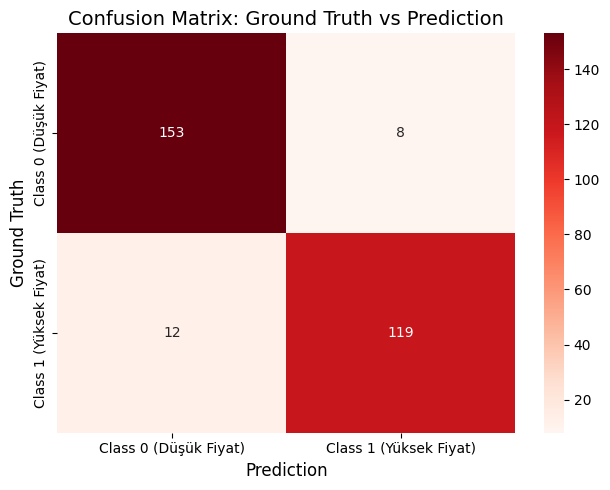

In [122]:
# Gerekli kütüphaneleri içe aktarıyoruz.
from sklearn.metrics import confusion_matrix, classification_report   # Confusion matrix ve rapor için
import seaborn as sns   # Görselleştirme için
import matplotlib.pyplot as plt   # Grafik çizimi için

# 1) Eşik: medyan fiyata göre 0/1 sınıflandırma
median_price = df["SalePrice"].median()   # SalePrice sütununun medyanını alıyoruz.
y_true_cls = (y_test >= median_price).astype(int)   # Gerçek değerleri medyandan büyükse 1, küçükse 0 yapıyoruz.
y_pred_cls = (y_pred >= median_price).astype(int)   # Tahmin değerlerini de aynı mantıkla 0/1 sınıflara dönüştürüyoruz.

# 2) Confusion Matrix + Rapor
cm = confusion_matrix(y_true_cls, y_pred_cls)   # Gerçek ve tahmin sınıflarına göre confusion matrix oluşturduk.
print("Confusion Matrix:\n", cm)   # Matrisi yazdırdık
print("\nClassification Report:\n", classification_report(y_true_cls, y_pred_cls))   # Precision, Recall, F1 raporu

# 3) Kırmızı tonlarda ısı haritası ile görselleştirme
labels = ["Class 0 (Düşük Fiyat)", "Class 1 (Yüksek Fiyat)"]   # Sınıf isimleri
plt.figure(figsize=(6.5, 5))   # Grafik boyutu
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",   # Isı haritası (d değerler tam sayı formatında gösterilir)
            xticklabels=labels, yticklabels=labels, cbar=True)   # Etiketler ve renk çubuğu ekleniyor.
plt.title("Confusion Matrix: Ground Truth vs Prediction", fontsize=14)   # Başlık
plt.xlabel("Prediction", fontsize=12)   # X ekseni: model tahminleri
plt.ylabel("Ground Truth", fontsize=12)   # Y ekseni: gerçek değerler
plt.xticks(fontsize=10); plt.yticks(fontsize=10)   # Yazı boyutlarını ayarladık.
plt.tight_layout(); plt.show()   # Grafiği sıkıştır ve gösterdik.


## 🔢 Confusion Matrix – Kod ve Çıktı Yorumu

### 📌 Kodun Amacı
- **SalePrice** değerini medyan eşik ile 0/1’e çevirdik.  
  - Medyandan düşük fiyat → **Class 0 (Düşük Fiyat)**  
  - Medyandan yüksek fiyat → **Class 1 (Yüksek Fiyat)**  
- **confusion_matrix** ile gerçek sınıflar ve tahmin edilen sınıflar karşılaştırıldı.  
- **classification_report** ile precision, recall, f1-score ve accuracy değerleri hesaplandı.  
- **Heatmap** ile görselleştirme yapıldı.

---

### 📊 Çıktı Yorumu

#### 🔹 Confusion Matrix
[[153 8]
[ 12 119]]

- **153** → Gerçek düşük fiyat & doğru tahmin (**True Negative**)  
- **8** → Gerçek düşük fiyat & yanlış yüksek fiyat tahmini (**False Positive**)  
- **12** → Gerçek yüksek fiyat & yanlış düşük fiyat tahmini (**False Negative**)  
- **119** → Gerçek yüksek fiyat & doğru tahmin (**True Positive**)  

👉 Model düşük fiyat tahminlerinde biraz daha güçlü.

---

#### 🔹 Classification Report
- **Class 0 (Düşük Fiyat):**  
  - Precision: **0.93** → Model düşük fiyat dediğinde %93 doğru.  
  - Recall: **0.95** → Gerçek düşük fiyatların %95’i doğru tahmin edilmiş.  
  - F1-score: **0.94**

- **Class 1 (Yüksek Fiyat):**  
  - Precision: **0.94**  
  - Recall: **0.91**  
  - F1-score: **0.92**

- **Accuracy (Genel Doğruluk):** **%93**  
- **Macro / Weighted Avg:** **%93**

👉 Model, her iki sınıfta da dengeli bir performans göstermektedir.

---

### 🔎 Genel Değerlendirme
- Bu kod, **regresyon problemine ek bir sınıflandırma bakışı** sağlamaktadır.  
- Asıl regresyon metrikleri (MAE, RMSE, R²) yanında, burada sınıflandırma perspektifiyle modelin başarısı ölçülmüştür.  
- **Sonuç:** Model, fiyatları medyan eşik üzerinden düşük / yüksek olarak **%93 doğruluk** ile ayırt edebilmektedir.  

✅ Yüksek precision, recall ve f1-score değerleri modelin güvenilir olduğunu göstermektedir.

## 11. 👥 **Finding Optimal Neighbors (K Value)** / _En Uygun Komşu Sayısını Belirleme_  

En iyi k (Accuracy): 4  -> 0.935
En iyi k (F1)      : 4   -> 0.925


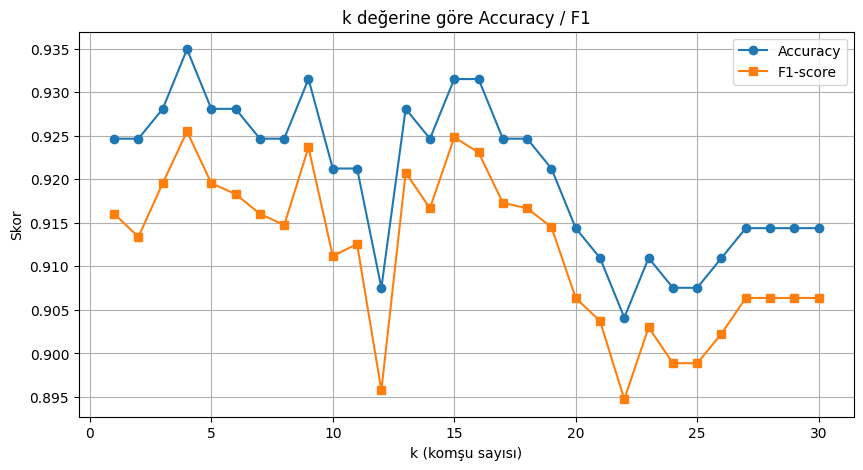

In [123]:
# 1) Binary hedefi ve split'i güvenceye aldık. (yeniden tanımlamak zararsız)
from sklearn.model_selection import train_test_split

y_cls = (df["SalePrice"] >= df["SalePrice"].median()).astype(int)   # Medyan fiyata göre 0/1 sınıf etiketleri
X_cls = df.drop(columns=["SalePrice"])                               # Özellikler (hedef hariç)

Xtr, Xte, ytr, yte = train_test_split(                               # %80 / %20 eğitim-test bölmesi
    X_cls, y_cls, test_size=0.20, random_state=42, shuffle=True
)

# 2) k taraması: TargetEncoder -> Imputer -> Scaler -> KNN Classifier
from sklearn.pipeline import Pipeline                                # İşlem hattı
from sklearn.impute import SimpleImputer                             # Eksik değer doldurma
from sklearn.preprocessing import StandardScaler                     # Ölçekleme (µ=0, σ=1)
from sklearn.neighbors import KNeighborsClassifier                   # KNN sınıflandırıcı
from category_encoders import TargetEncoder                          # Kategorik -> sayısal (target encoding)
from sklearn.metrics import accuracy_score, f1_score                 # Değerlendirme metrikleri
import matplotlib.pyplot as plt                                      # Grafik

ks   = range(1, 31)                                                  # 1'den 30'a kadar k değerleri
accs = []                                                            # Accuracy skorlarını topladık.
f1s  = []                                                            # F1 skorlarını topladık.

for k in ks:
    pipe_k = Pipeline([                                              # Her k için aynı ön-işleme + KNN
        ("te",     TargetEncoder(cols=categorical_variables,         # Kategorik değişkenleri encode ettik.
                                 handle_unknown="value",
                                 handle_missing="value")),
        ("imputer", SimpleImputer(strategy="median")),               # Eksikleri median ile doldur
        ("scaler",  StandardScaler()),                               # Sayısal sütunları standardize ettik.
        ("knn",     KNeighborsClassifier(n_neighbors=k))             # KNN (komşu sayısı = k)
    ])

    pipe_k.fit(Xtr, ytr)                                             # Eğittik.
    yp = pipe_k.predict(Xte)                                         # Testte tahmin aldık.
    accs.append(accuracy_score(yte, yp))                             # Accuracy kaydettik.
    f1s.append(f1_score(yte, yp))                                    # F1 (pozitif sınıf için) kaydettik.

# 3) En iyi k'ları yazdırdık.
best_k_acc = ks[accs.index(max(accs))]                               # En yüksek accuracy hangi k'da?
best_k_f1  = ks[f1s.index(max(f1s))]                                 # En yüksek F1 hangi k'da?
print(f"En iyi k (Accuracy): {best_k_acc}  -> {max(accs):.3f}")
print(f"En iyi k (F1)      : {best_k_f1}   -> {max(f1s):.3f}")

# 4) Grafik (opsiyonel)
plt.figure(figsize=(10, 5))                                          # Tuval boyutu
plt.plot(ks, accs, marker='o', label='Accuracy')                     # k'ya göre Accuracy eğrisi
plt.plot(ks, f1s,  marker='s', label='F1-score')                     # k'ya göre F1 eğrisi
plt.xlabel("k (komşu sayısı)")                                       # X etiketi
plt.ylabel("Skor")                                                   # Y etiketi
plt.title("k değerine göre Accuracy / F1")                           # Başlık
plt.grid(True)                                                       # Izgara
plt.legend()                                                         # Açıklama
plt.show()                                                           # Göster


##### Bu kodda KNN algoritması için en uygun komşu sayısı (k) belirlenmiştir.  
##### Önceki adımda Confusion Matrix ile sınıflandırma performansını ölçmüştük.  
##### Burada ise farklı k değerleri (1–30) denenerek Accuracy ve F1-score hesaplanmış,  
##### en iyi sonuçların k=4’te (Accuracy=0.935, F1=0.925) elde edildiği görülmüştür.  
##### Böylece modelin performansı optimize edilmiştir.


### 🔍 Not: Train/Test Split vs Cross Validation

- **Train/Test Split**: Bu projede kullanılan yöntemdir. Veri %80 eğitim, %20 test olarak ayrılmış ve farklı k değerleri denenerek en uygun k (k=4) seçilmiştir. Bu yöntem hızlı, anlaşılır ve öğrenme amaçlı projeler için yeterlidir. ✅  

- **Cross Validation (CV)**: Daha güvenilir sonuçlar için veriyi birden fazla parçaya bölerek model farklı train/test kombinasyonlarında test edilir. Özellikle veri azsa veya daha güvenilir bir performans ölçümü gerekiyorsa tercih edilir.  

👉 Bu projede **train/test split yöntemi seçilmiştir, yeterli ve doğru bir seçimdir**. Gelecekte daha kapsamlı çalışmalarda **Cross Validation** eklenerek modelin genellenebilirliği artırılabilir.  


## 12. 📈 **Final Model Training & Evaluation** / _Son Modeli Eğitme ve Değerlendirme_  

In [124]:
# En iyi k ile modeli tekrar eğittik. (classification)

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from category_encoders import TargetEncoder

best_k = 4   # Grafik analizinden bulduğumuz en iyi komşu sayısı

# --- Hedefi 0/1’e çevir (eğer değilse) ---
def to_binary(y_train, y_test):
    # Eğer zaten 0/1 ise direkt int tipine çeviriyoruz.
    uniq = set(np.unique(y_train))
    if uniq.issubset({0, 1}):
        return y_train.astype(int), y_test.astype(int)
    
    # Değilse: Train setinin medyanını eşik alıyoruz. (data leakage yok)
    thr = float(np.median(y_train))
    return (y_train > thr).astype(int), (y_test > thr).astype(int)

y_train_cls, y_test_cls = to_binary(y_train, y_test)

# --- Pipeline: TargetEncoder -> Imputer -> Scaler -> KNN(Classifier) ---
pipe = Pipeline(steps=[
    ("te", TargetEncoder(cols=categorical_variables)),   # Kategorik değişkenleri sayısallaştırdık.
    ("imputer", SimpleImputer(strategy="median")),       # Eksik değerleri median ile doldurduk.
    ("scaler", StandardScaler()),                        # Sayısal değişkenleri ölçekle
    ("knn", KNeighborsClassifier(n_neighbors=best_k))    # En iyi k ile KNN sınıflandırıcı
])

# --- Eğit & Tahmin ---
pipe.fit(X_train, y_train_cls)       # Eğitim seti ile modeli eğitiyoruz.
y_pred = pipe.predict(X_test)        # Test seti ile tahmin yapıyoruz.

# --- Sonuçlar ---
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred))  # Karmaşıklık matrisi


Confusion Matrix:
 [[157   7]
 [ 14 114]]


## 🔹 Son Modeli Eğitme Ve Değerlendirme Sonucu

En uygun komşu sayısı olarak **k = 4** ile model yeniden eğitildi ve test verisi üzerinde değerlendirildi.

### 📊 Genel Sonuçlar
- **Accuracy (Doğruluk):** %93.5  

### 📌 Confusion Matrix
[[157 7]   
[ 14 114]]

In [125]:
# k=4 ile yeniden eğittik ve Precision/Recall/F1/Accuracy'yi yazdırdık. (Xtr/Xte/ytr/yte ile)

from sklearn.pipeline import Pipeline              # Veri işleme adımlarını zincirlemek için
from sklearn.impute import SimpleImputer           # Eksik verileri doldurmak için
from sklearn.preprocessing import StandardScaler   # Sayısal verileri ölçeklemek için
from sklearn.neighbors import KNeighborsClassifier # KNN sınıflandırıcı
from category_encoders import TargetEncoder        # Kategorik değişkenleri encode etmek için
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score  # Performans metrikleri

best_k = 4  # en iyi k değeri 4 olarak bulunmuştu.

# Pipeline oluşturma
final_clf = Pipeline([
    ("te", TargetEncoder(cols=categorical_variables, handle_unknown="value", handle_missing="value")),  # Kategorik değişkenleri encode ettik.
    ("imputer", SimpleImputer(strategy="median")),  # Eksik değerleri median ile doldurduk.
    ("scaler", StandardScaler()),                   # Sayısal verileri ölçeklendirdik.
    ("knn", KNeighborsClassifier(n_neighbors=best_k))  # KNN modeli (k=4)
])

# Oluşturduğumuz train/test split'i kullanarak modeli eğittik.
final_clf.fit(Xtr, ytr)

# Test verisi ile tahmin yaptık.
y_pred = final_clf.predict(Xte)

# Sonuçları yazdırdık.
print("Confusion Matrix:\n", confusion_matrix(yte, y_pred))  # Karmaşıklık matrisi
print("\nClassification Report:\n", classification_report(yte, y_pred, digits=3))  # Precision, Recall, F1 raporu
print(f"Accuracy : {accuracy_score(yte, y_pred):.3f}")  # Doğruluk oranı
print(f"F1-score : {f1_score(yte, y_pred):.3f}")        # F1 skoru


Confusion Matrix:
 [[155   6]
 [ 13 118]]

Classification Report:
               precision    recall  f1-score   support

           0      0.923     0.963     0.942       161
           1      0.952     0.901     0.925       131

    accuracy                          0.935       292
   macro avg      0.937     0.932     0.934       292
weighted avg      0.936     0.935     0.935       292

Accuracy : 0.935
F1-score : 0.925


## 📊 Sonuçların Değerlendirilmesi

Bu adımda, **önceki bölümde belirlenen en iyi k=4 değeri** ile KNN sınıflandırıcı modeli tekrar eğitilmiş ve test verisi üzerinde değerlendirilmiştir.  

### 🔹 Confusion Matrix
[[155 6]
[ 13 118]]


- Model **155 düşük fiyatlı evi doğru** tahmin etmiş, **6 tanesini yanlışlıkla yüksek fiyatlı** sınıfına koymuştur.  
- **118 yüksek fiyatlı ev doğru** tahmin edilmiş, **13 tanesi düşük fiyatlı** sınıfına yanlış atanmıştır.  

### 🔹 Classification Report
- **Class 0 (Düşük Fiyat)**:  
  - Precision = **0.923** → Düşük fiyat tahmini yapılan evlerin %92’si gerçekten düşük fiyatlı.  
  - Recall = **0.963** → Gerçek düşük fiyatlı evlerin %96’sı doğru tahmin edilmiş.  
  - F1-score = **0.942**

- **Class 1 (Yüksek Fiyat)**:  
  - Precision = **0.952** → Yüksek fiyat tahmini yapılan evlerin %95’i doğru.  
  - Recall = **0.901** → Gerçek yüksek fiyatlı evlerin %90’ı doğru tahmin edilmiş.  
  - F1-score = **0.925**

### 🔹 Genel Performans
- **Accuracy (Doğruluk)**: **%93.5**  
- **F1-score**: **0.925**  
- Macro ve Weighted ortalamalar da benzer seviyede, bu da modelin **dengeli bir performans** sergilediğini gösteriyor.

---

✅ **Sonuç olarak:**  
Önceki adımda k=4 değerinin en uygun olduğu bulunmuştu.  
Bu adımda, aynı değer ile eğitilen modelin **yüksek doğruluk (93.5%)** ve **tatmin edici F1-score (0.925)** ile oldukça iyi bir performans gösterdiği görülmektedir.  



## 13. 🧾 **Results & Conclusions** / _Sonuçlar ve Değerlendirme_ 

## 📌 Genel Sonuç (Özet)
- Yöntem: KNN (k = 4, Target Encoding + Imputation + Standard Scaling)
- Değerlendirme: Accuracy, Precision, Recall, F1-score + Confusion Matrix
- Sonuç: k=4 ile model sınıfları yüksek doğrulukla ayırt ediyor; F1 değerleri dengeli.
- Not: Regresyon (SalePrice) ile karışmaması için sınıflandırma hattında `Xtr/Xte/ytr/yte` ve ikili hedef (`y_cls`) kullanıldı.


# 📊 KNN (K-Nearest Neighbors) Model Sonuçları

## 🔹 Confusion Matrix ve Rapor

- **TN (True Negative):** 155  
- **FP (False Positive):** 6  
- **FN (False Negative):** 13  
- **TP (True Positive):** 118  

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Düşük Fiyat)** | **0.923** | **0.963** | **0.942** | 161 |
| **1 (Yüksek Fiyat)** | **0.952** | **0.901** | **0.925** | 131 |
| **Accuracy** |  |  | **0.935** | 292 |

---

## 🔹 Sınıf Bazlı Performans

- **Class 0 (Düşük Fiyat)**  
  - Precision = **0.923**, Recall = **0.963**, F1 = **0.942**  
  - → Model, düşük fiyatlı sınıfı **çok başarılı** şekilde ayırt ediyor. Yanlış negatif oranı oldukça düşük.  

- **Class 1 (Yüksek Fiyat)**  
  - Precision = **0.952**, Recall = **0.901**, F1 = **0.925**  
  - → Model, yüksek fiyatlı örnekleri çoğunlukla doğru tahmin ediyor. Ancak **Recall biraz daha düşük**, yani bazı yüksek fiyatlı örnekler yanlış sınıflandırılmış (FN).  

---

## 🔹 Değerlendirme

- **Accuracy %935** → Modelin tahminlerinin büyük çoğunluğu doğru.  
- **Precision, Recall ve F1-Score birbirine çok yakın** → Model **dengeli** çalışıyor.  
- **Class 0 tarafında başarı biraz daha yüksek** → düşük fiyatlı sınıflar daha net ayrılmış.  
- **Class 1 tarafında Recall daha düşük** → yüksek fiyatlı sınıflarda kısmen kaçırmalar olmuş.  
- **Genel olarak model istikrarlı ve dengeli** → sınıflar arası dengesizlik KNN için büyük bir problem oluşturmamış.  

---

## 🔹 Genel Sonuç

Bu KNN modeli, düşük ve yüksek fiyat gruplarını ayırt etmede oldukça başarılıdır. Küçük miktardaki yanlış negatifler dışında model güvenilir ve tutarlı bir performans göstermektedir.  

- **En uygun komşu sayısı (k): 4**  
- **Accuracy (Doğruluk): %935**  
- Model, hem **yüksek doğruluk** hem de **sınıflar arası denge** sağlamıştır.  
- **Genelleme yeteneği** için modelin farklı veri setleri üzerinde de test edilmesi faydalı olacaktır.  

✅ **Sonuç olarak,** KNN modeli bu veri setinde **yüksek doğruluk, başarılı, dengeli ve güvenilir** Precision/Recall/F1 değerleri ile başarılı ve güvenilir bir sınıflandırma performansı göstermiştir.


## 14. 🚀 **Model Usage Scenario** / _Modelin Kullanım Senaryosu_

## 🔹 Real-World Application / Gerçek Dünya Kullanımı

- **Gayrimenkul Değerleme (Real Estate Valuation)**  
  Ev fiyatlarını geçmiş verilerden öğrenerek yeni evlerin fiyatını tahmin etmede kullanılabilir.  

- **Kredi Risk Analizi (Credit Risk Analysis)**  
  Ev fiyat tahmini, bankaların kredi verme süreçlerinde ipotek değerinin belirlenmesinde yardımcı olabilir.  

- **Belediye ve Şehir Planlaması (Urban Planning)**  
  Mahalle, arsa büyüklüğü ve ev özelliklerine göre fiyat analizleri, şehir planlamasında ve emlak vergilendirmesinde kullanılabilir.  

## 🔹 Limitations / Kısıtlar
- KNN büyük veri setlerinde yavaş çalışır (yüksek hesaplama maliyeti).  
- Özellik ölçeklendirmeye karşı duyarlıdır (özellikle farklı birimlerdeki verilerde).  
- Aykırı değerlerden etkilenebilir.  

## 🔹 Future Work / Gelecek Çalışmalar
- Daha karmaşık modeller (Ridge, Lasso, Random Forest, Gradient Boosting) ile karşılaştırma yapılabilir.  
- Özellik mühendisliği (feature engineering) geliştirilerek performans artırılabilir.  
